<a href="https://colab.research.google.com/github/Boshra-01/Messi_Goals_Data_Analysis/blob/main/Messi_the_GOAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries:

In [1]:
from google.colab import files
from google.colab.data_table import DataTable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image
import itertools

# Reading File:

In [2]:
# from local device:
# uploaded = files.upload()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Google drive:

file_path = "/content/drive/My Drive/Colab Notebooks/messi.csv"
df = pd.read_csv(file_path)
print(df.head())

#df = pd.read_csv('messi.csv')
         # the structure of table was not tabular, thus i " import DataTable". instead of "print(df.head())", i tried:
#DataTable(df.head(10))


  Season            Competition     Matchday      Date Venue          Club  \
0  04/05                 LaLiga           34  05-01/05     H  FC Barcelona   
1  05/06  UEFA Champions League  Group Stage  11-02/05     H  FC Barcelona   
2  05/06                 LaLiga           13  11/27/05     H  FC Barcelona   
3  05/06                 LaLiga           19   1/15/06     H  FC Barcelona   
4  05/06                 LaLiga           20   1/22/06     H  FC Barcelona   

               Opponent Result Playing_Position Minute At_score  \
0     Albacete Balompie   2:00               CF   90+1     2:00   
1  Panathinaikos Athens   5:00               RW     34     3:00   
2      Racing Santander   4:01               RW     51     2:00   
3       Athletic Bilbao   2:01               RW     50     2:01   
4      Deportivo Alaves   2:00               CF     82     2:00   

               Type        Goal_assist  
0  Left-footed shot  Ronaldinho Gaacho  
1  Left-footed shot                NaN  
2  Le

# **--  --  --  Anasysis  --  --  --**

**Interactive view of the first 10 rows:**

In [5]:
# Display in Table Widget / in a scrollable table.
from google.colab.data_table import DataTable
DataTable(df)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,22/23,Ligue 1,21,2/1/23,A,Paris Saint-Germain,Montpellier HSC,1:3,SS,72,0:2,Left-footed shot,Fabián Ruiz
700,22/23,Ligue 1,22,2/4/23,H,Paris Saint-Germain,FC Toulouse,2:1,SS,58,2:1,Left-footed shot,Achraf Hakimi
701,22/23,Ligue 1,24,2/19/23,H,Paris Saint-Germain,LOSC Lille,4:3,CF,90+5,4:3,Direct free kick,\t
702,22/23,Ligue 1,25,2/26/23,A,Paris Saint-Germain,Olympique Marseille,0:3,CF,29,0:2,Right-footed shot,Kylian Mbappé


In [6]:
# Optional: beautification: Save as Pretty Table in a more readable format using libraries like tabulate.
from tabulate import tabulate
# print(tabulate(df, headers='keys', tablefmt='pretty'))

print("First 5 Rows:")
print(tabulate(df.head(5), headers='keys', tablefmt='pretty', showindex=False))

print("\nLast 5 Rows:")
print(tabulate(df.tail(5), headers='keys', tablefmt='pretty', showindex=False))

First 5 Rows:
+--------+-----------------------+-------------+----------+-------+--------------+----------------------+--------+------------------+--------+----------+------------------+-------------------+
| Season |      Competition      |  Matchday   |   Date   | Venue |     Club     |       Opponent       | Result | Playing_Position | Minute | At_score |       Type       |    Goal_assist    |
+--------+-----------------------+-------------+----------+-------+--------------+----------------------+--------+------------------+--------+----------+------------------+-------------------+
| 04/05  |        LaLiga         |     34      | 05-01/05 |   H   | FC Barcelona |  Albacete Balompie   |  2:00  |        CF        |  90+1  |   2:00   | Left-footed shot | Ronaldinho Gaacho |
| 05/06  | UEFA Champions League | Group Stage | 11-02/05 |   H   | FC Barcelona | Panathinaikos Athens |  5:00  |        RW        |   34   |   3:00   | Left-footed shot |        nan        |
| 05/06  |        LaL

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            704 non-null    object
 1   Competition       704 non-null    object
 2   Matchday          704 non-null    object
 3   Date              704 non-null    object
 4   Venue             704 non-null    object
 5   Club              704 non-null    object
 6   Opponent          704 non-null    object
 7   Result            704 non-null    object
 8   Playing_Position  704 non-null    object
 9   Minute            704 non-null    object
 10  At_score          704 non-null    object
 11  Type              703 non-null    object
 12  Goal_assist       490 non-null    object
dtypes: object(13)
memory usage: 71.6+ KB


**Summary statistics:**

In [8]:
df.describe()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,704,704,704,704,704,704,704,704,704,704,704,703,490
unique,19,10,48,455,2,2,98,55,9,97,46,12,71
top,11-Dec,LaLiga,Group Stage,03/07/12,H,FC Barcelona,Sevilla FC,4:00,CF,55,1:00,Left-footed shot,Luis Suarez
freq,73,474,80,5,420,672,38,47,276,14,98,436,48


**Count of missing values:**

In [9]:
df.isnull().sum()                       # df.isna().sum()

,0
Season,0
Competition,0
Matchday,0
Date,0
Venue,0
Club,0
Opponent,0
Result,0
Playing_Position,0
Minute,0


**Unique value count:**

In [10]:
df.nunique()

,0
Season,19
Competition,10
Matchday,48
Date,455
Venue,2
Club,2
Opponent,98
Result,55
Playing_Position,9
Minute,97


**Counting entries in a specific (minute) column:**

In [11]:
df.Minute.count()   # alternative: df.Minute.count().sum()

704

In [12]:
df.Competition.count()

704

**(boolean) Value is True / False if opponent(column) is "Real Madrid" :**

In [13]:
Messi_elClassico = df['Opponent']== "Real Madrid"
Messi_elClassico

,Opponent
0,False
1,False
2,False
3,False
4,False
...,...
699,False
700,False
701,False
702,False


**Filters all rows containing Opponent as "Real Madrid":**
- stores in Messi_elClassico

In [14]:
Messi_elClassico = df[df['Opponent']== "Real Madrid"]
Messi_elClassico

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
13,06/07,LaLiga,26,03/10/07,H,FC Barcelona,Real Madrid,3:03,RW,11,1:01,Left-footed shot,Samuel Etoo
14,06/07,LaLiga,26,03/10/07,H,FC Barcelona,Real Madrid,3:03,RW,28,2:02,Left-footed shot,NaN
15,06/07,LaLiga,26,03/10/07,H,FC Barcelona,Real Madrid,3:03,RW,90+1,3:03,Left-footed shot,Ronaldinho Gaacho
57,08/09,LaLiga,15,12/13/08,H,FC Barcelona,Real Madrid,2:00,RW,89,2:00,Counter attack goal,Thierry Henry
76,08/09,LaLiga,34,05-02/09,A,FC Barcelona,Real Madrid,2:06,CF,35,1:03,Left-footed shot,Xavi
77,08/09,LaLiga,34,05-02/09,A,FC Barcelona,Real Madrid,2:06,CF,75,2:05,Left-footed shot,Xavi
119,09/10,LaLiga,31,04/10/10,A,FC Barcelona,Real Madrid,0:02,CF,32,0:01,Right-footed shot,Xavi
175,10/11,LaLiga,32,4/16/11,A,FC Barcelona,Real Madrid,1:01,CF,53,0:01,Penalty,NaN
177,10/11,UEFA Champions League,Semi-Finals,4/27/11,A,FC Barcelona,Real Madrid,0:02,CF,76,0:01,Left-footed shot,Ibrahim Afellay
178,10/11,UEFA Champions League,Semi-Finals,4/27/11,A,FC Barcelona,Real Madrid,0:02,CF,87,0:02,Solo run,Sergio Busquets


**Unique players from the Goal_assist column and the number of goals they assisted during El-Classico** 🥎

In [15]:
Messi_elClassico['Goal_assist'].value_counts()

,count
Goal_assist,
Xavi,3
Samuel Etoo,1
Ronaldinho Gaacho,1
Thierry Henry,1
Ibrahim Afellay,1
Sergio Busquets,1
Thiago,1
Gerard Pique,1
Adriano,1


**Filter rows of El-Classico based on the League name where El-Classico took place**
- stores in Messi_elClassico_league

In [16]:
Messi_elClassico_league = df[(df['Opponent']== "Real Madrid") & (df['Competition']== "UEFA Champions League")]
Messi_elClassico_league

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
177,10/11,UEFA Champions League,Semi-Finals,4/27/11,A,FC Barcelona,Real Madrid,0:02,CF,76,0:01,Left-footed shot,Ibrahim Afellay
178,10/11,UEFA Champions League,Semi-Finals,4/27/11,A,FC Barcelona,Real Madrid,0:02,CF,87,0:02,Solo run,Sergio Busquets


**Counts the number of matches played in each Season in El-Classico in UEFA Champions League:**

In [17]:
Messi_elClassico_league['Season'].value_counts()


,count
Season,
10/11,2


In [18]:
Messi_elClassico_league['Goal_assist'].value_counts()


,count
Goal_assist,
Ibrahim Afellay,1
Sergio Busquets,1


**Displays unique player's individual count of them assisted in scoring goal:**

In [19]:
df['Goal_assist'].value_counts()

,count
Goal_assist,
Luis Suarez,48
Dani Alves,42
Andres Iniesta,39
Xavi,34
Neymar,30
...,...
Aleksandr Hleb,1
Antonio A05a,1
Alex Song,1


**Goals Messi scored against each opponent:**

In [20]:
df['Opponent'].value_counts()

,count
Opponent,
Sevilla FC,38
Atletico de Madrid,32
Valencia CF,31
Athletic Bilbao,29
Real Betis Balompie,26
...,...
Borussia MÃ¶nchengladbach,1
Olympiacos Piraeus,1
SK Slavia Prague,1


**Bar chart of Goals Scored Against Each Opponent by** **Messi:**

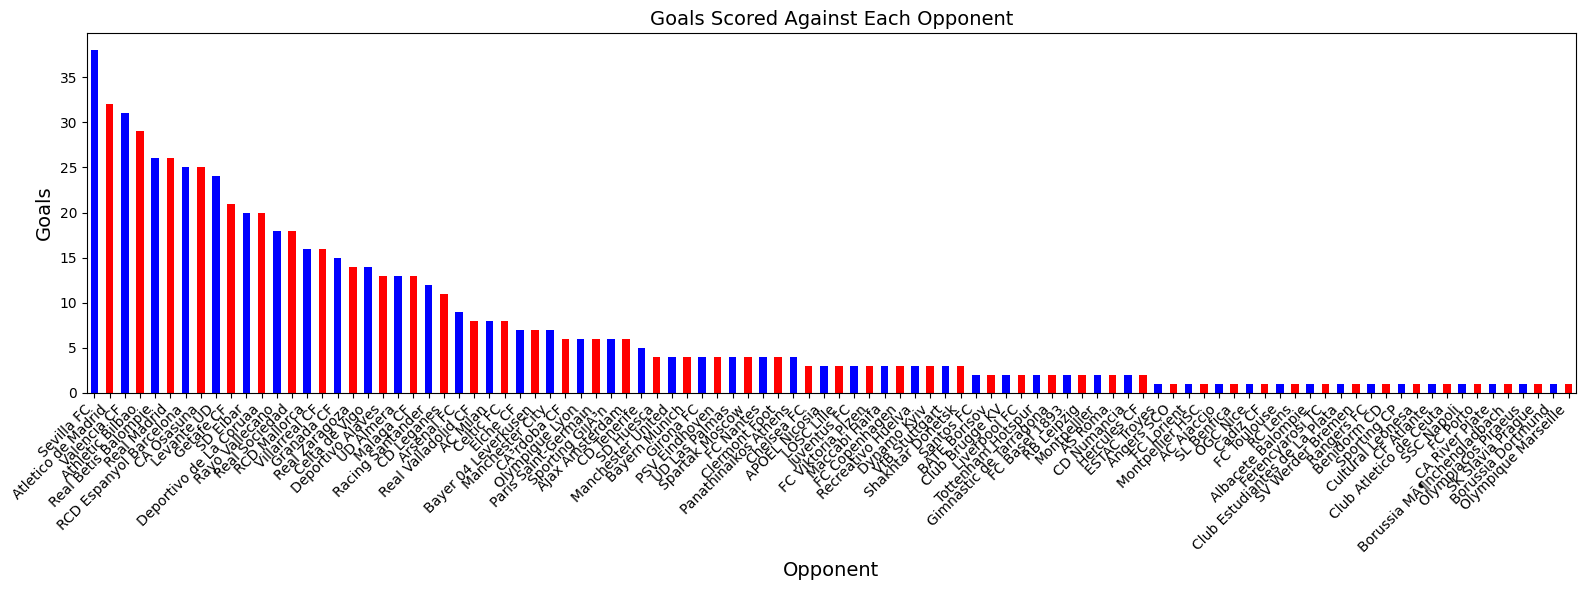

In [21]:
Opponent_counts = df['Opponent'].value_counts()

colors = list(itertools.islice(itertools.cycle(['blue', 'red']), len(Opponent_counts)))
plt.figure(figsize=(16, 6))
Opponent_counts.plot(kind='bar', color=colors)

plt.xlabel('Opponent', fontsize=14)
plt.ylabel('Goals', fontsize=14)
plt.title('Goals Scored Against Each Opponent', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout() # # Adjust layout to prevent label clipping
plt.show()


**Away and Home** 😉

**Detail of all the matches, taking place at Home!**

In [22]:
Home_matches = df['Venue']=='H'
Home_matches

,Venue
0,True
1,True
2,True
3,True
4,True
...,...
699,False
700,True
701,True
702,False


In [23]:
Home_matches = df[df['Venue']=='H']
Home_matches

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,22/23,Ligue 1,13,10/29/22,H,Paris Saint-Germain,ESTAC Troyes,4:3,RW,55,2:2,Left-footed shot,Sergio Ramos
698,22/23,Ligue 1,18,1/11/23,H,Paris Saint-Germain,Angers SCO,2:0,AM,72,2:0,Right-footed shot,Nordi Mukiele
700,22/23,Ligue 1,22,2/4/23,H,Paris Saint-Germain,FC Toulouse,2:1,SS,58,2:1,Left-footed shot,Achraf Hakimi
701,22/23,Ligue 1,24,2/19/23,H,Paris Saint-Germain,LOSC Lille,4:3,CF,90+5,4:3,Direct free kick,\t


In [24]:
df['Venue'].value_counts()

,count
Venue,
H,420
A,284


**Bar plot of Messi's Goals Scored at Home vs Away:**

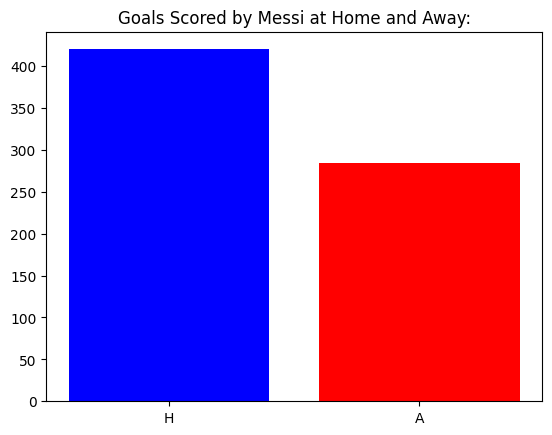

In [25]:
Venue_Goals = df['Venue'].value_counts()

colors = ['Blue', 'Red']

plt.bar(Venue_Goals.index, Venue_Goals.values, color=colors[:len(Venue_Goals)])
plt.title('Goals Scored by Messi at Home and Away:')

plt.show()

**Pie chart of goals Home and Away:**

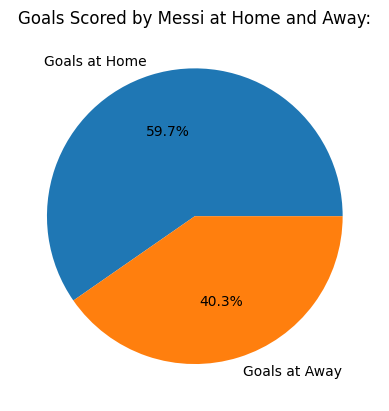

In [26]:
# Using MATPLOTLIB USING PLASMA DISPLAY

Venue_Goals = df['Venue'].value_counts()
Total_Home_goals = df[df['Venue']=='H']['Venue'].count()
Total_Away_goals = df[df['Venue']=='A']['Venue'].count()
index_counts = [Total_Home_goals, Total_Away_goals]
index_labels = ['Goals at Home', 'Goals at Away']

plt.pie(index_counts, labels=index_labels, autopct = '%1.1f%%' )
plt.title('Goals Scored by Messi at Home and Away:')
plt.show()

**Filters matches at the Home and counts them:**

In [27]:
Home_matches = df[df['Venue']=='H']['Venue'].count()
Home_matches

420

**Total Goals Scored by** **Lionel Messi** ❤


In [28]:
df.count()   #total entries

,0
Season,704
Competition,704
Matchday,704
Date,704
Venue,704
Club,704
Opponent,704
Result,704
Playing_Position,704
Minute,704


In [29]:
df['Playing_Position'].value_counts() # Messi's unique playing position

,count
Playing_Position,
CF,276
RW,221
RW,95
CF,40
SS,32
SS,23
AM,9
AM,7
LW,1


In [30]:
df['Playing_Position'].value_counts()

,count
Playing_Position,
CF,276
RW,221
RW,95
CF,40
SS,32
SS,23
AM,9
AM,7
LW,1


In [31]:
df[df['Playing_Position']=='CF '].count() # speicifies playing position

,0
Season,40
Competition,40
Matchday,40
Date,40
Venue,40
Club,40
Opponent,40
Result,40
Playing_Position,40
Minute,40


**Display all match info where Messi played in Central Forward position:**

In [32]:
playing_position = df[df['Playing_Position']=='CF']
playing_position

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho
5,05/06,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:03,CF,75,0:02,Right-footed shot,Sylvinho
6,05/06,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:03,CF,83,0:03,Left-footed shot,Ronaldinho Gaacho
7,05/06,Copa del Rey,Quarter-Finals,02-01/06,H,FC Barcelona,Real Zaragoza,2:01,CF,42,1:00,Header,Ludovic Giuly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,22/23,Ligue 1,1,08/06-22,A,Paris Saint-Germain,Clermont Foot,0:05,CF,86,0:05,Left-footed shot,Leandro Paredes
694,22/23,Ligue 1,12,10/21/22,A,Paris Saint-Germain,AC Ajaccio,0:3,CF,78,0:2,Left-footed shot,Kylian Mbappe
701,22/23,Ligue 1,24,2/19/23,H,Paris Saint-Germain,LOSC Lille,4:3,CF,90+5,4:3,Direct free kick,\t
702,22/23,Ligue 1,25,2/26/23,A,Paris Saint-Germain,Olympique Marseille,0:3,CF,29,0:2,Right-footed shot,Kylian Mbappé


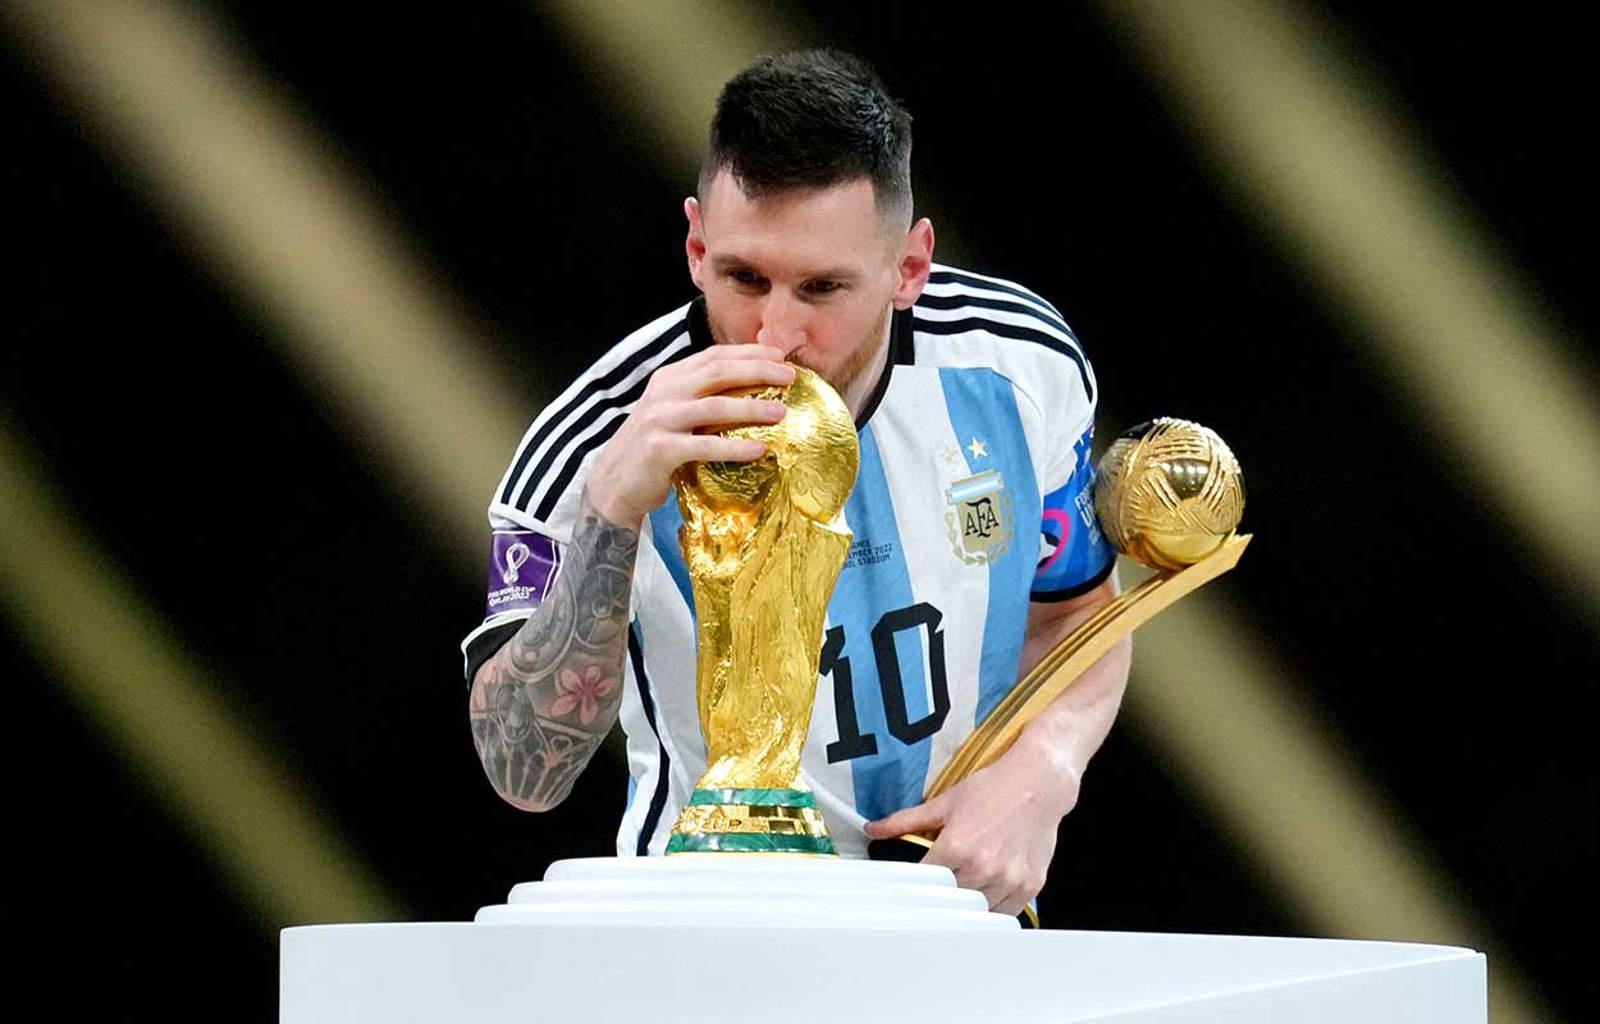

**Bar Plot for Goals by** **Messi** **by Playing Position:**
- Lionel Messi Scored most of his club goals playing in Center Forward and Right Wing positions

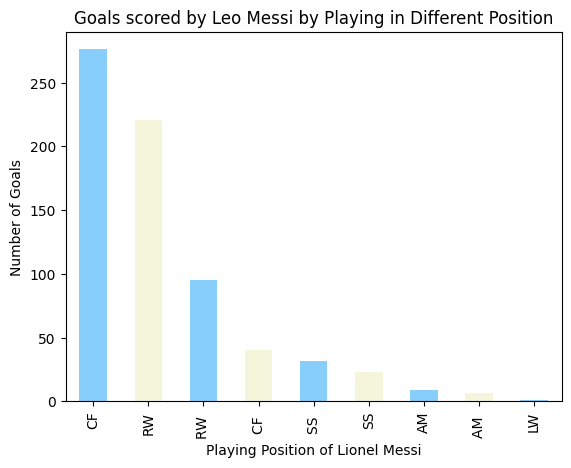

In [33]:
Goal_by_Positions = df['Playing_Position'].value_counts()

colors = ['lightskyblue', 'Beige']

Goal_by_Positions.plot(kind='bar', color = colors[:len(Goal_by_Positions)])

plt.xlabel('Playing Position of Lionel Messi')
plt.ylabel('Number of Goals')

plt.title('Goals scored by Leo Messi by Playing in Different Position')

plt.show()

In [34]:
df[df['Competition']=="LaLiga"].count()  # Filters all records where Messi played in LaLiga matches.

,0
Season,474
Competition,474
Matchday,474
Date,474
Venue,474
Club,474
Opponent,474
Result,474
Playing_Position,474
Minute,474


In [35]:
df[df['Competition']=="LaLiga"]['Competition'].count()

474

**Counts all goals scored by Messi during or before the 45th minute:**

In [36]:
df[df['Minute']<='45'].count()

,0
Season,283
Competition,283
Matchday,283
Date,283
Venue,283
Club,283
Opponent,283
Result,283
Playing_Position,283
Minute,283


In [37]:
df[df['Minute']<='45']['Minute'].count()

283

**Counts goals scored after the 45th minute:**

In [38]:
df[df['Minute']>'45']['Minute'].count()

421

**Goals scored on extra time:**

In [39]:
df[df['Minute']>='90']['Minute'].count()

39

 Pie chart showing **First-half vs Second-half goals:**

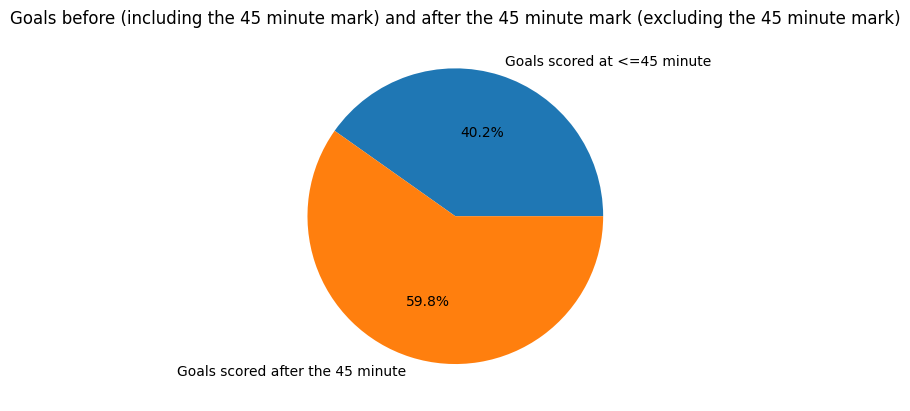

In [40]:
Goals_scored_at_less_than_or_equal_to_45min = df[df['Minute']<='45']['Minute'].count()
Goals_scored_after_the_45min_mark = df[df['Minute']>'45']['Minute'].count()

index_counts = [Goals_scored_at_less_than_or_equal_to_45min, Goals_scored_after_the_45min_mark]
index_labels = ['Goals scored at <=45 minute', 'Goals scored after the 45 minute']

plt.pie(index_counts, labels = index_labels, autopct='%1.1f%%')
plt.title('Goals before (including the 45 minute mark) and after the 45 minute mark (excluding the 45 minute mark)')

plt.show()

In [41]:
df.groupby('Club').size()

# df.groupby('Club'):groups the df based on the values in the 'Club' column.Each unique value in the 'Club' column will create a separate group.
# .size(): After grouping the data by club, the .size() function counts the number of rows in each group. Essentially, it counts how many matches (or rows) each club has in the dataset.

,0
Club,
FC Barcelona,672
Paris Saint-Germain,32


**Plot of Clubs:**

In [42]:
Home_matches = df[df['Venue']=='H']['Venue'].count()
Home_matches

420

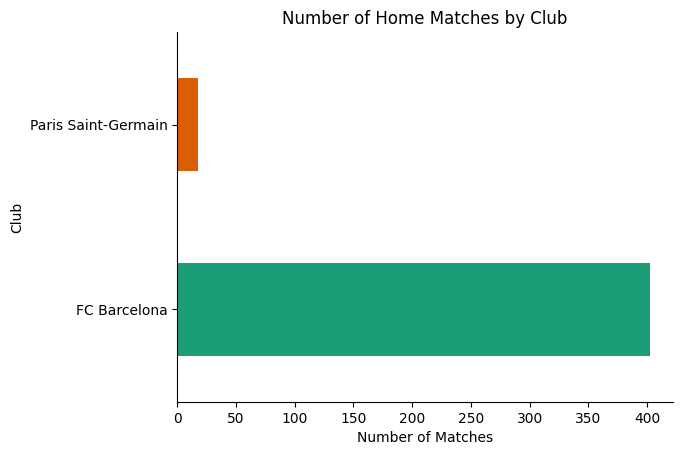

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns

# Filter the DataFrame for home matches
home_matches = df[df['Venue'] == 'H']

# Group by 'Club' and count the number of home matches for each club
home_matches_by_club = home_matches.groupby('Club').size()

# Plot the data as a horizontal bar chart
home_matches_by_club.plot(kind='barh', color=sns.color_palette('Dark2', len(home_matches_by_club)))

plt.title('Number of Home Matches by Club')
plt.xlabel('Number of Matches')
plt.ylabel('Club')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


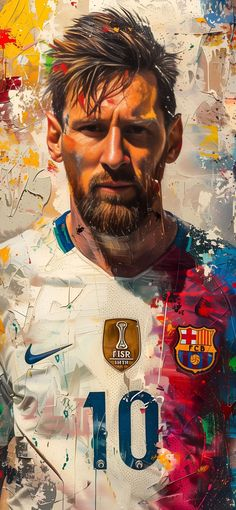

In [44]:
Image('/content/drive/MyDrive/messi.jpg')

In [45]:
df['Competition'].value_counts()

,count
Competition,
LaLiga,474
UEFA Champions League,128
Copa del Rey,56
Ligue 1,21
Supercopa,14
FIFA Club World Cup,5
UEFA Super Cup,3
Trophée des Champions,1
Troph�e des Champions,1


Bar plot of Messi's goals scored across competitions:

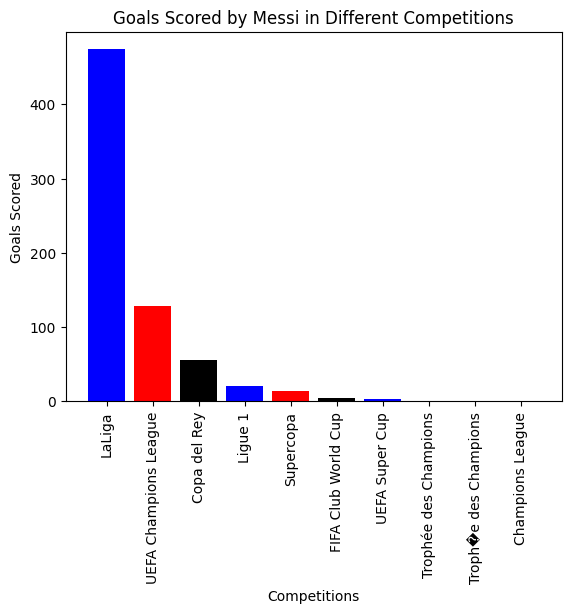

In [46]:
Tgoal_by_Competition = df['Competition'].value_counts()

colors = ['Blue', 'Red', 'Black'] # colours of FCB!

plt.bar(Tgoal_by_Competition.index, Tgoal_by_Competition.values, color=colors[:len(Tgoal_by_Competition)])

plt.xticks(rotation=90) #  # rotates x-axis  by 90 degrees labels(Competition) for readability in a crowded plot

plt.xlabel('Competitions')
plt.ylabel('Goals Scored')

plt.title('Goals Scored by Messi in Different Competitions')

plt.show()


**Heatmap using Seaborn to Analyze Goal Distribution:**

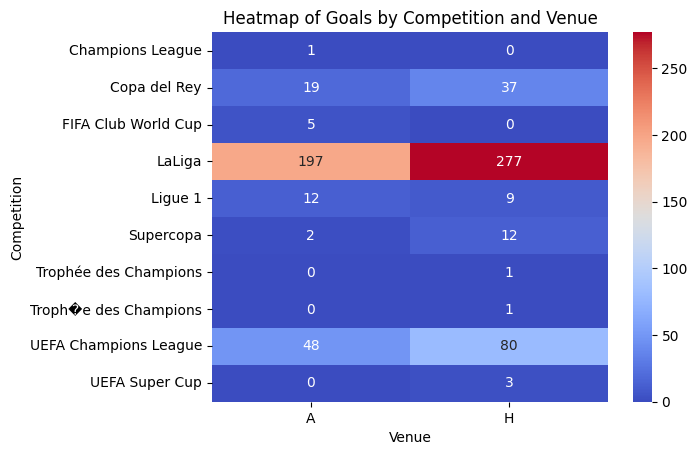

In [47]:
import seaborn as sns
heatmap_data = df.pivot_table(index='Competition', columns='Venue', values='Minute', aggfunc='count', fill_value=0)
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d') # fmt='d' = ensures values are displayed as integers.
plt.title('Heatmap of Goals by Competition and Venue')
plt.xlabel('Venue')
plt.ylabel('Competition')
plt.show()


Visualizes type of techniques **Messi** used to score goals:

In [48]:
Type_counts = df['Type'].value_counts()
Type_counts

,count
Type,
Left-footed shot,436
Right-footed shot,86
Penalty,84
Direct free kick,52
Header,24
Tap-in,9
Solo run,4
Penalty rebound,3
Deflected shot on goal,2


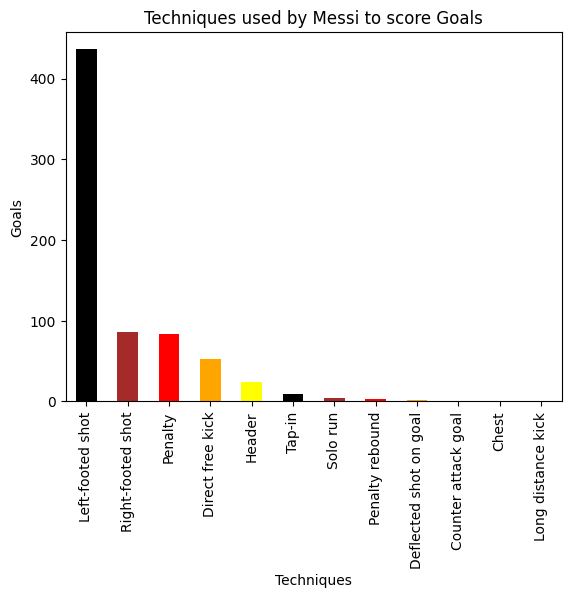

In [49]:
Type_counts = df['Type'].value_counts()
colors = ['Black', 'Brown', 'Red', 'Orange', 'Yellow']

Type_counts.plot(kind='bar', color = colors[:len(Type_counts)])

plt.ylabel('Goals')
plt.xlabel('Techniques')


plt.title('Techniques used by Messi to score Goals')

plt.show()

**Pie chart of deisplaying goals by competition:**

**Option 1:**

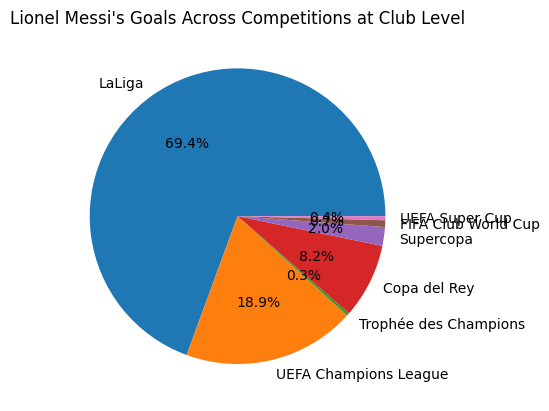

In [50]:
# Pie Plot for Studying the distribution of goals scored by Lionel Messi Across all Competions at Club Level
LaLiga_goal_count = df[df['Competition']=="LaLiga"]['Competition'].count()
Champions_League_goal_count = df[df['Competition']=="UEFA Champions League"]['Competition'].count() + 1 #see the value_counts for Competitions table above, I have added the Chamions League goal to the UEFA Champions League goal since both of them were the same.
Trophée_des_Champions_goal_count = 2 #see the value_counts table for Competitions above
Copa_del_Rey_goal_count = df[df['Competition']=="Copa del Rey"]['Competition'].count()
Supercopa_goal_count = df[df['Competition']=="Supercopa"]['Competition'].count()
FIFA_club_world_cup_goal_count = df[df['Competition']=="FIFA Club World Cup"]['Competition'].count()
UEFA_Super_Cup_goal_count = df[df['Competition']=="UEFA Super Cup"]['Competition'].count()

index_counts = [LaLiga_goal_count, Champions_League_goal_count, Trophée_des_Champions_goal_count, Copa_del_Rey_goal_count, Supercopa_goal_count, FIFA_club_world_cup_goal_count, UEFA_Super_Cup_goal_count]
index_labels = ["LaLiga", "UEFA Champions League", "Trophée des Champions", "Copa del Rey", "Supercopa", "FIFA Club World Cup", "UEFA Super Cup" ]
plt.pie(index_counts, labels = index_labels, autopct = '%1.1f%%')
plt.title("Lionel Messi's Goals Across Competitions at Club Level")
plt.show()

**Option 2:**

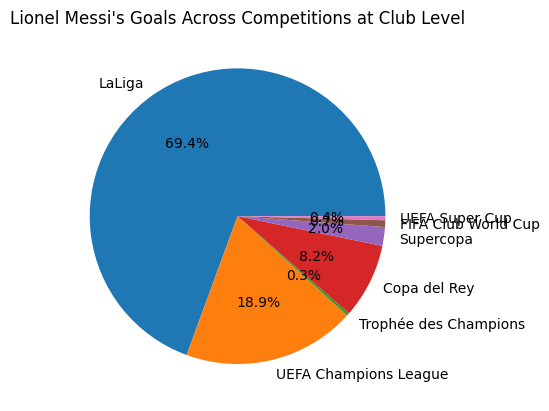

In [51]:
index_counts = [LaLiga_goal_count, Champions_League_goal_count, Trophée_des_Champions_goal_count, Copa_del_Rey_goal_count, Supercopa_goal_count, FIFA_club_world_cup_goal_count, UEFA_Super_Cup_goal_count]
index_labels = ["LaLiga", "UEFA Champions League", "Trophée des Champions", "Copa del Rey", "Supercopa", "FIFA Club World Cup", "UEFA Super Cup"]

plt.pie(index_counts, labels=index_labels, autopct='%1.1f%%')
plt.title("Lionel Messi's Goals Across Competitions at Club Level")
plt.show()


In [52]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

total_goals_scored_by_year = df.groupby('Year').size()
total_goals_scored_by_year

<ipython-input-52-97663addf04b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,0
Year,
2005,3
2006,10
2007,25
2008,20
2009,38
2010,58
2011,55
2012,79
2013,39


Cleaning and Analyzing Competition Names:

In [53]:
df['Competition'] = df['Competition'].str.strip()  # .str.strip() = removes leading/trailing spaces.
df['Competition'].value_counts()


,count
Competition,
LaLiga,474
UEFA Champions League,128
Copa del Rey,56
Ligue 1,21
Supercopa,14
FIFA Club World Cup,5
UEFA Super Cup,3
Trophée des Champions,1
Troph�e des Champions,1


Total Number of Goals Scored by Leo Messi in All Club Competitions by Year:
- The best club performances of Leo Messi can be seen to occur in the year 2012 the year in which he scored the most goals for the football club Barcelona. He scored the highest number of goals (91) including club and country in the year 2012 and as of 7 Sept. 2024, he still holds the record of most goals scores in a calendar year by a football player due to his exceptional performances in this year.

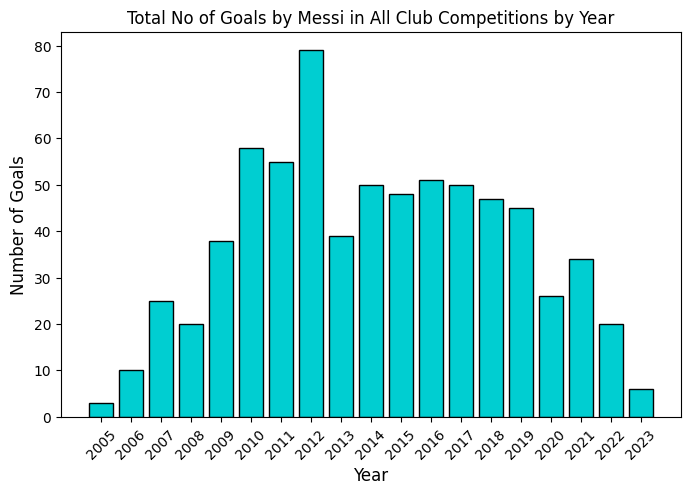

In [54]:
plt.figure(figsize=(8,5))
plt.bar(total_goals_scored_by_year.index, total_goals_scored_by_year.values, color='darkturquoise', edgecolor='black')

plt.xticks(total_goals_scored_by_year.index, labels = total_goals_scored_by_year.index, rotation=45)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Goals', fontsize=12)

plt.title('Total No of Goals by Messi in All Club Competitions by Year', fontsize=12)
plt.show()



In [55]:
df['Month'] = df['Date'].dt.month

total_goals_scored_by_month = df.groupby('Month').size()
total_goals_scored_by_month

,0
Month,
1,94
2,82
3,92
4,70
5,55
6,7
7,5
8,40
9,73


In [56]:
total_goals_scored_by_month.sum()
#No missing values encountered we are safe to proceed.

704

**Number of Goals scored by** **Lionel Messi** **by Each Month of the Year:**

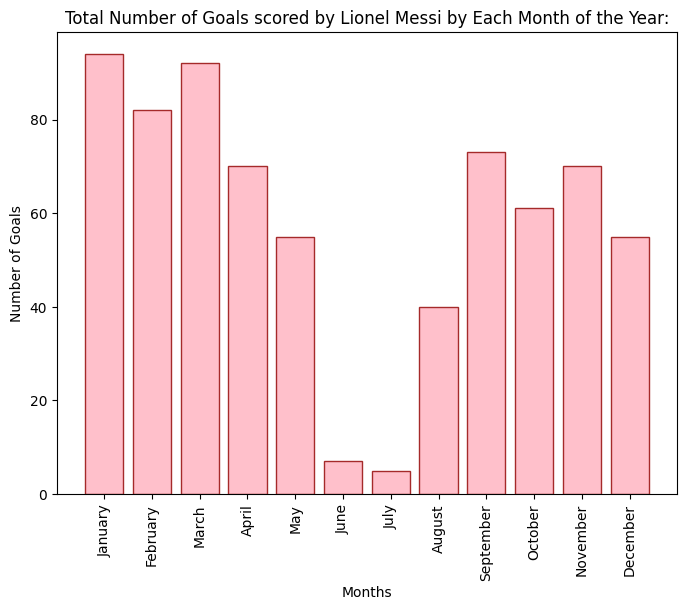

In [57]:
plt.figure(figsize=(8,6))
plt.bar(total_goals_scored_by_month.index, total_goals_scored_by_month.values, color = 'Pink', edgecolor='brown')

plt.xticks(total_goals_scored_by_month.index, labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=90)

plt.xlabel('Months')
plt.ylabel('Number of Goals')

plt.title('Total Number of Goals scored by Lionel Messi by Each Month of the Year:')

plt.show()

**Overview of Goals scored by Lionel Messi in Each Club:**

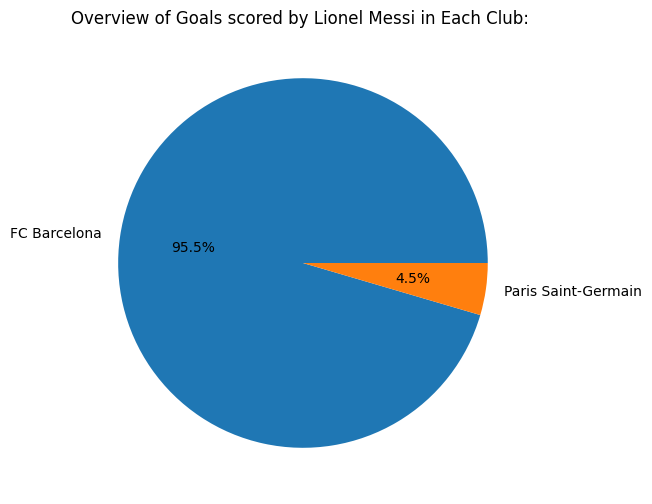

In [58]:
total_goals_scored_for_FCB = df[df['Club']=='FC Barcelona']['Club'].count()
total_goals_scored_for_PSG = df[df['Club']=='Paris Saint-Germain']['Club'].count()

index_counts = [total_goals_scored_for_FCB, total_goals_scored_for_PSG]
index_labels = ['FC Barcelona', 'Paris Saint-Germain']

plt.figure(figsize=(10, 6))
plt.pie(index_counts, labels=index_labels, autopct='%1.1f%%')
plt.title('Overview of Goals scored by Lionel Messi in Each Club: ')

plt.show()

**Total Number of Goals scored by Messi by Season:**

In [59]:
goals_by_season = df.groupby('Season').size()
goals_by_season

,0
Season,
04/05,1
05/06,8
06/07,17
07/08,16
08/09,38
09/10,47
10/11,53
11-Dec,73
13/14,41


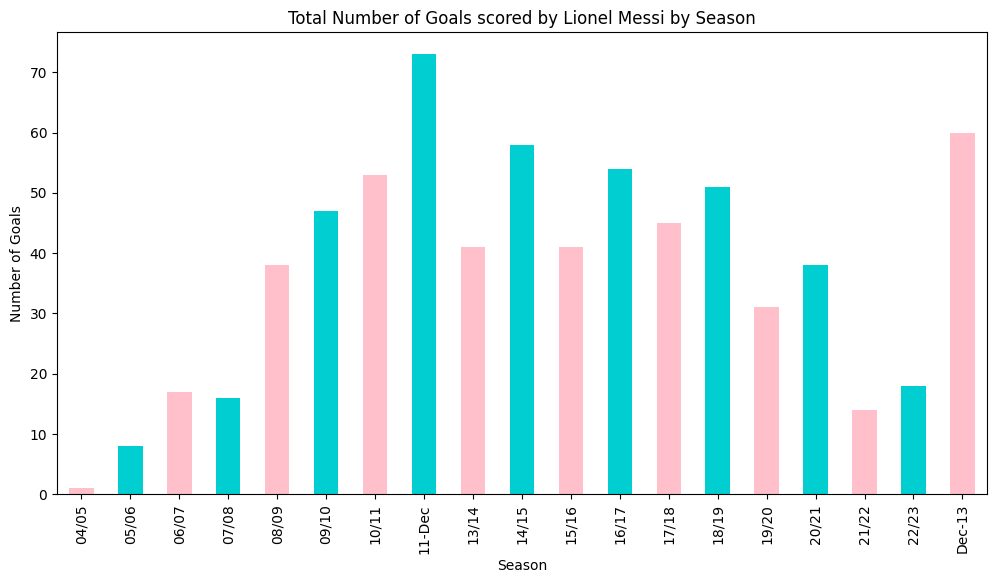

In [60]:
colors = ['pink', 'darkturquoise']
#colors = ['pink', 'orange', 'lightcoral', 'green', 'mediumaquamarine', 'cadetblue', 'peru', 'darkturquoise']

plt.figure(figsize=(12,6))
goals_by_season.plot(kind='bar', color=colors[:len(goals_by_season)])

plt.xlabel('Season')
plt.ylabel('Number of Goals')

plt.title('Total Number of Goals scored by Lionel Messi by Season')

plt.show()

## Cleaning the 'Minute' column and plots (histogram) the distribution of goals by minute:

In [61]:
def clean_minute(minute):
    if '+' in minute:    # removes extra time notation (+)
        return int(minute.split('+')[0])
    else:
        return int(minute)

clean = df['Clean_Minute'] = df['Minute'].apply(clean_minute)
clean

,Minute
0,90
1,34
2,51
3,50
4,82
...,...
699,72
700,58
701,90
702,29


[]

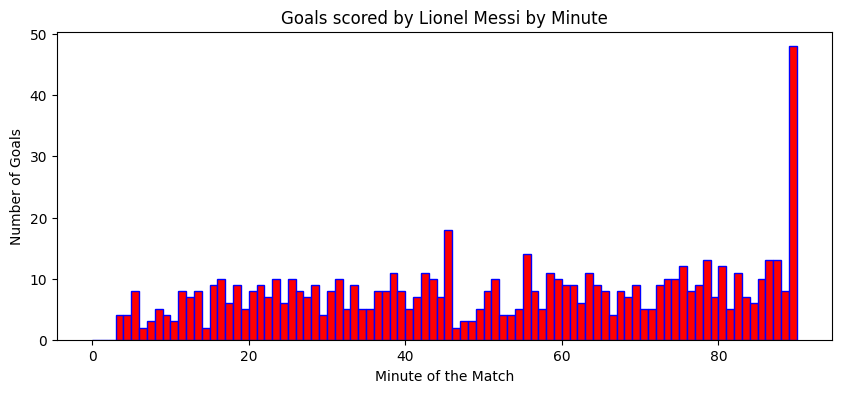

In [62]:
def clean_minute(minute):
    if '+' in minute:    # removes extra time notation (+)
        return int(minute.split('+')[0])
    else:
        return int(minute)
df['Clean_Minute'] = df['Minute'].apply(clean_minute)


plt.figure(figsize=(10,4)) # width, length
plt.hist(df['Clean_Minute'], bins=90, range=(0,90), color='Red', edgecolor='Blue')
# or/ plt.hist(clean , bins=90, range=(0,90), color='orange', edgecolor='black')

plt.title('Goals scored by Lionel Messi by Minute')

plt.xlabel('Minute of the Match')
plt.ylabel('Number of Goals')

plt.plot()


**Goals scored by Lionel Messi by Minute During First-half:**

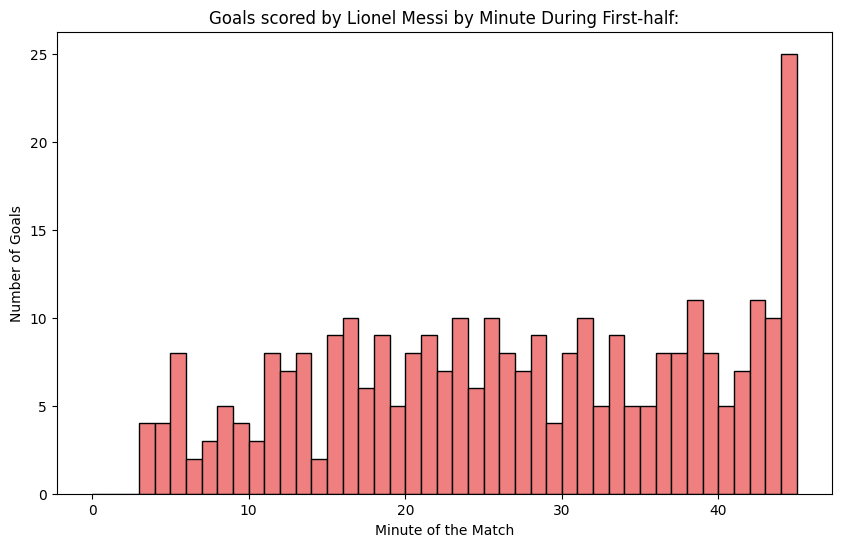

In [63]:
plt.figure(figsize=(10,6))
plt.hist(df['Clean_Minute'], bins=45, range=(0,45), color='lightcoral', edgecolor='black')

plt.xlabel('Minute of the Match')
plt.ylabel('Number of Goals')

plt.title('Goals scored by Lionel Messi by Minute During First-half:')

plt.show()

**Goals scored by Lionel Messi by Minute During Second-half:**

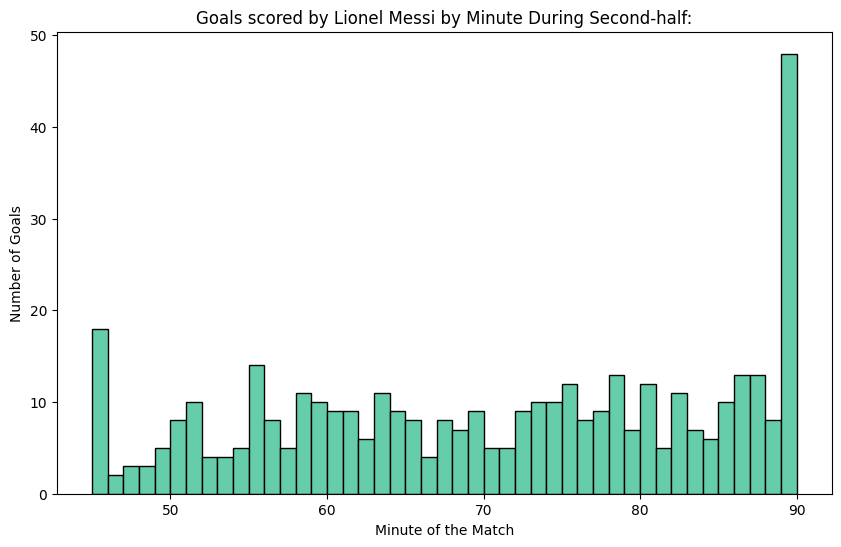

In [64]:
plt.figure(figsize=(10,6))

plt.hist(df['Clean_Minute'], bins=45, range=(45,90), color= 'mediumaquamarine', edgecolor='black')

plt.xlabel('Minute of the Match')
plt.ylabel('Number of Goals')

plt.title('Goals scored by Lionel Messi by Minute During Second-half:')

plt.show()